In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import numpy as np
import geopandas as gpd
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS,**mcolors.CSS4_COLORS)
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import join_data, train_test,hervy_dist, minutes_convert, haversine,taxi_demand_cluster, predict_lat_long, plt_map

In [3]:
dst_folder = os.path.join(os.getcwd(),"Processed_Data")

In [4]:
df = join_data(dst_folder)

In [5]:
df.dtypes

Unnamed: 0       int64
Latitude       float64
Longitude      float64
Occupancy        int64
Date            object
Hour             int64
Day              int64
Latitude_1     float64
Longitude_1    float64
Occupancy_1      int64
Date_1          object
Hour_1           int64
Day_1            int64
Cab_Name        object
dtype: object

In [6]:
df_cluster, df_centroids = taxi_demand_cluster(df,6, 2,1, 300, 20)

Number of clusters: 9
Centroid for Label:  0 37.76146892857143 -122.43499964285714
Centroid for Label:  1 37.79117742331288 -122.4044245092025
Centroid for Label:  2 37.6162729090909 -122.38751472727273
Centroid for Label:  3 37.7846062962963 -122.4330685185185
Centroid for Label:  4 37.76255536585366 -122.4211412195122
Centroid for Label:  5 37.77913586206896 -122.39362396551722
Centroid for Label:  6 37.79272901960785 -122.42219137254902
Centroid for Label:  7 37.80802563636364 -122.41330418181819
Centroid for Label:  8 37.79979076923077 -122.4384780769231


In [7]:
test_lat =[37.790890,-122.407408]

In [8]:
dfc, df = predict_lat_long(test_lat, df_centroids)

In [9]:
dfc

,Latitude_1,Longitude_1,Distance
1,37.791177,-122.404425,264.105890
3,37.784606,-122.433069,2360.710067
0,37.761469,-122.435000,4072.253606
2,37.616273,-122.387515,19495.249481


In [10]:
df

,Latitude_1,Longitude_1,label
0,37.761469,-122.435000,1.0
1,37.791177,-122.404425,2.0
2,37.616273,-122.387515,3.0
3,37.784606,-122.433069,4.0
0,37.790890,-122.407408,0.0


Plot


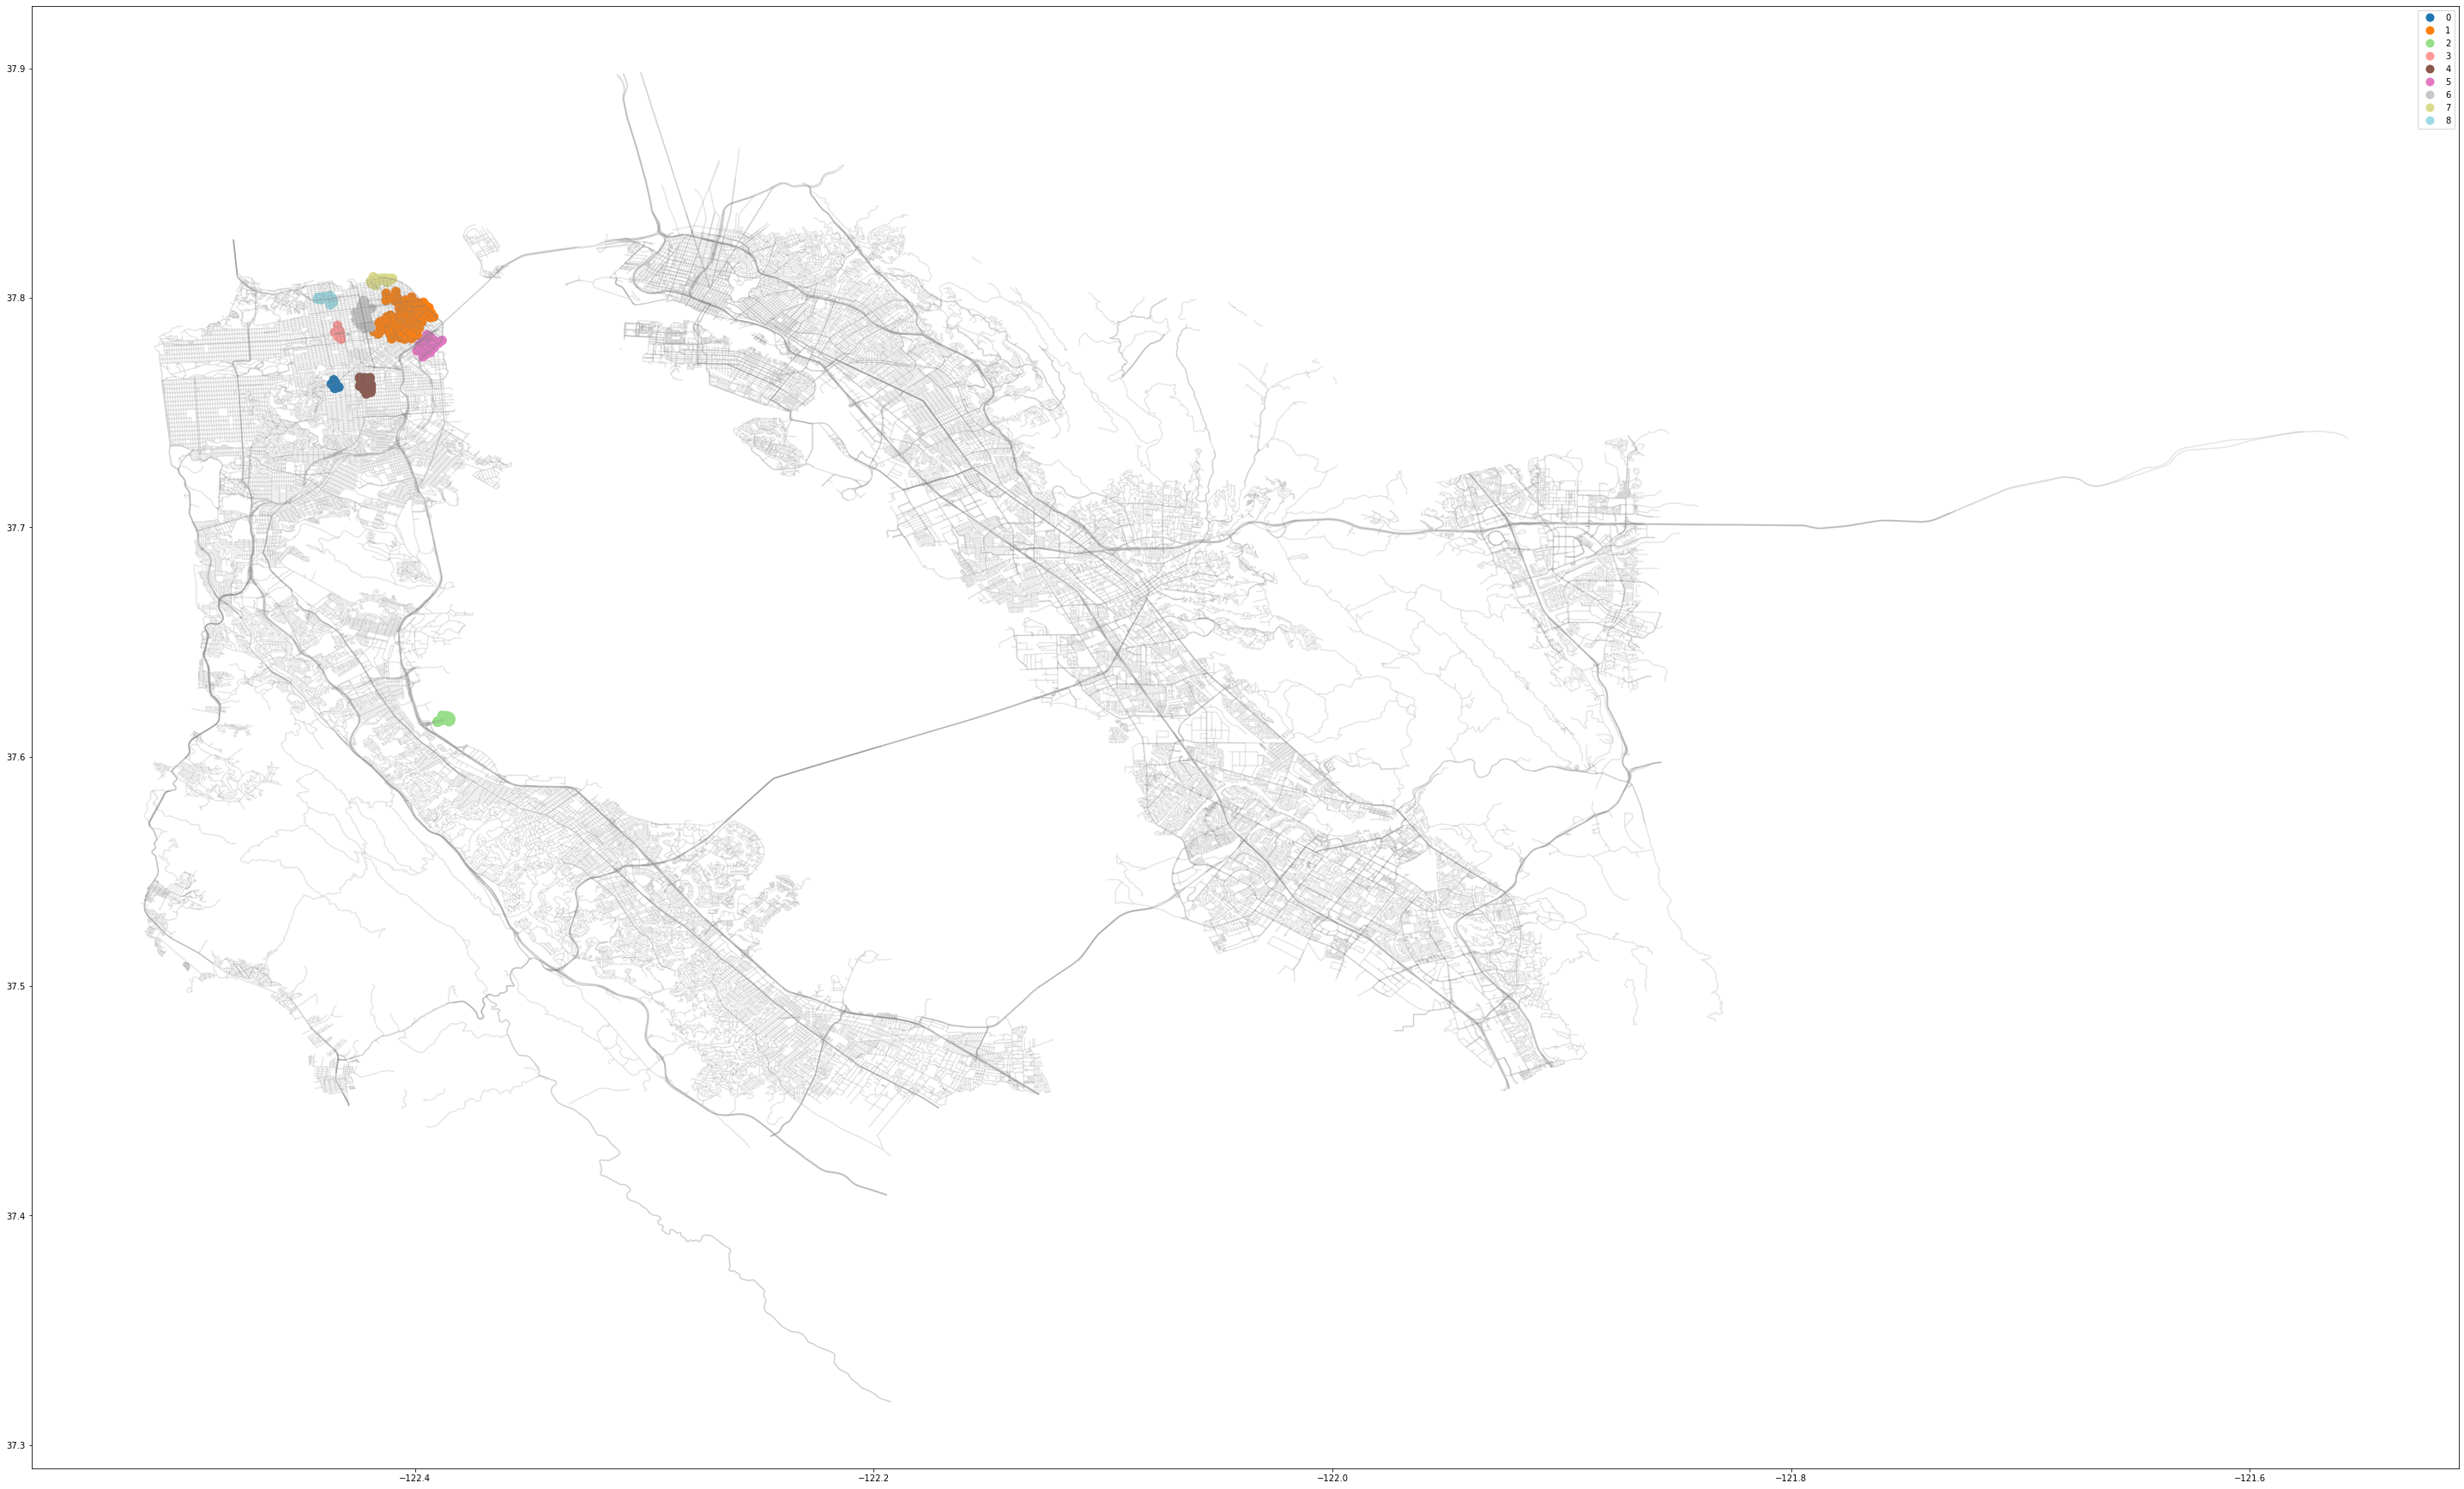

In [11]:
plt_map(df_cluster,"cluster.jpg")

Plot


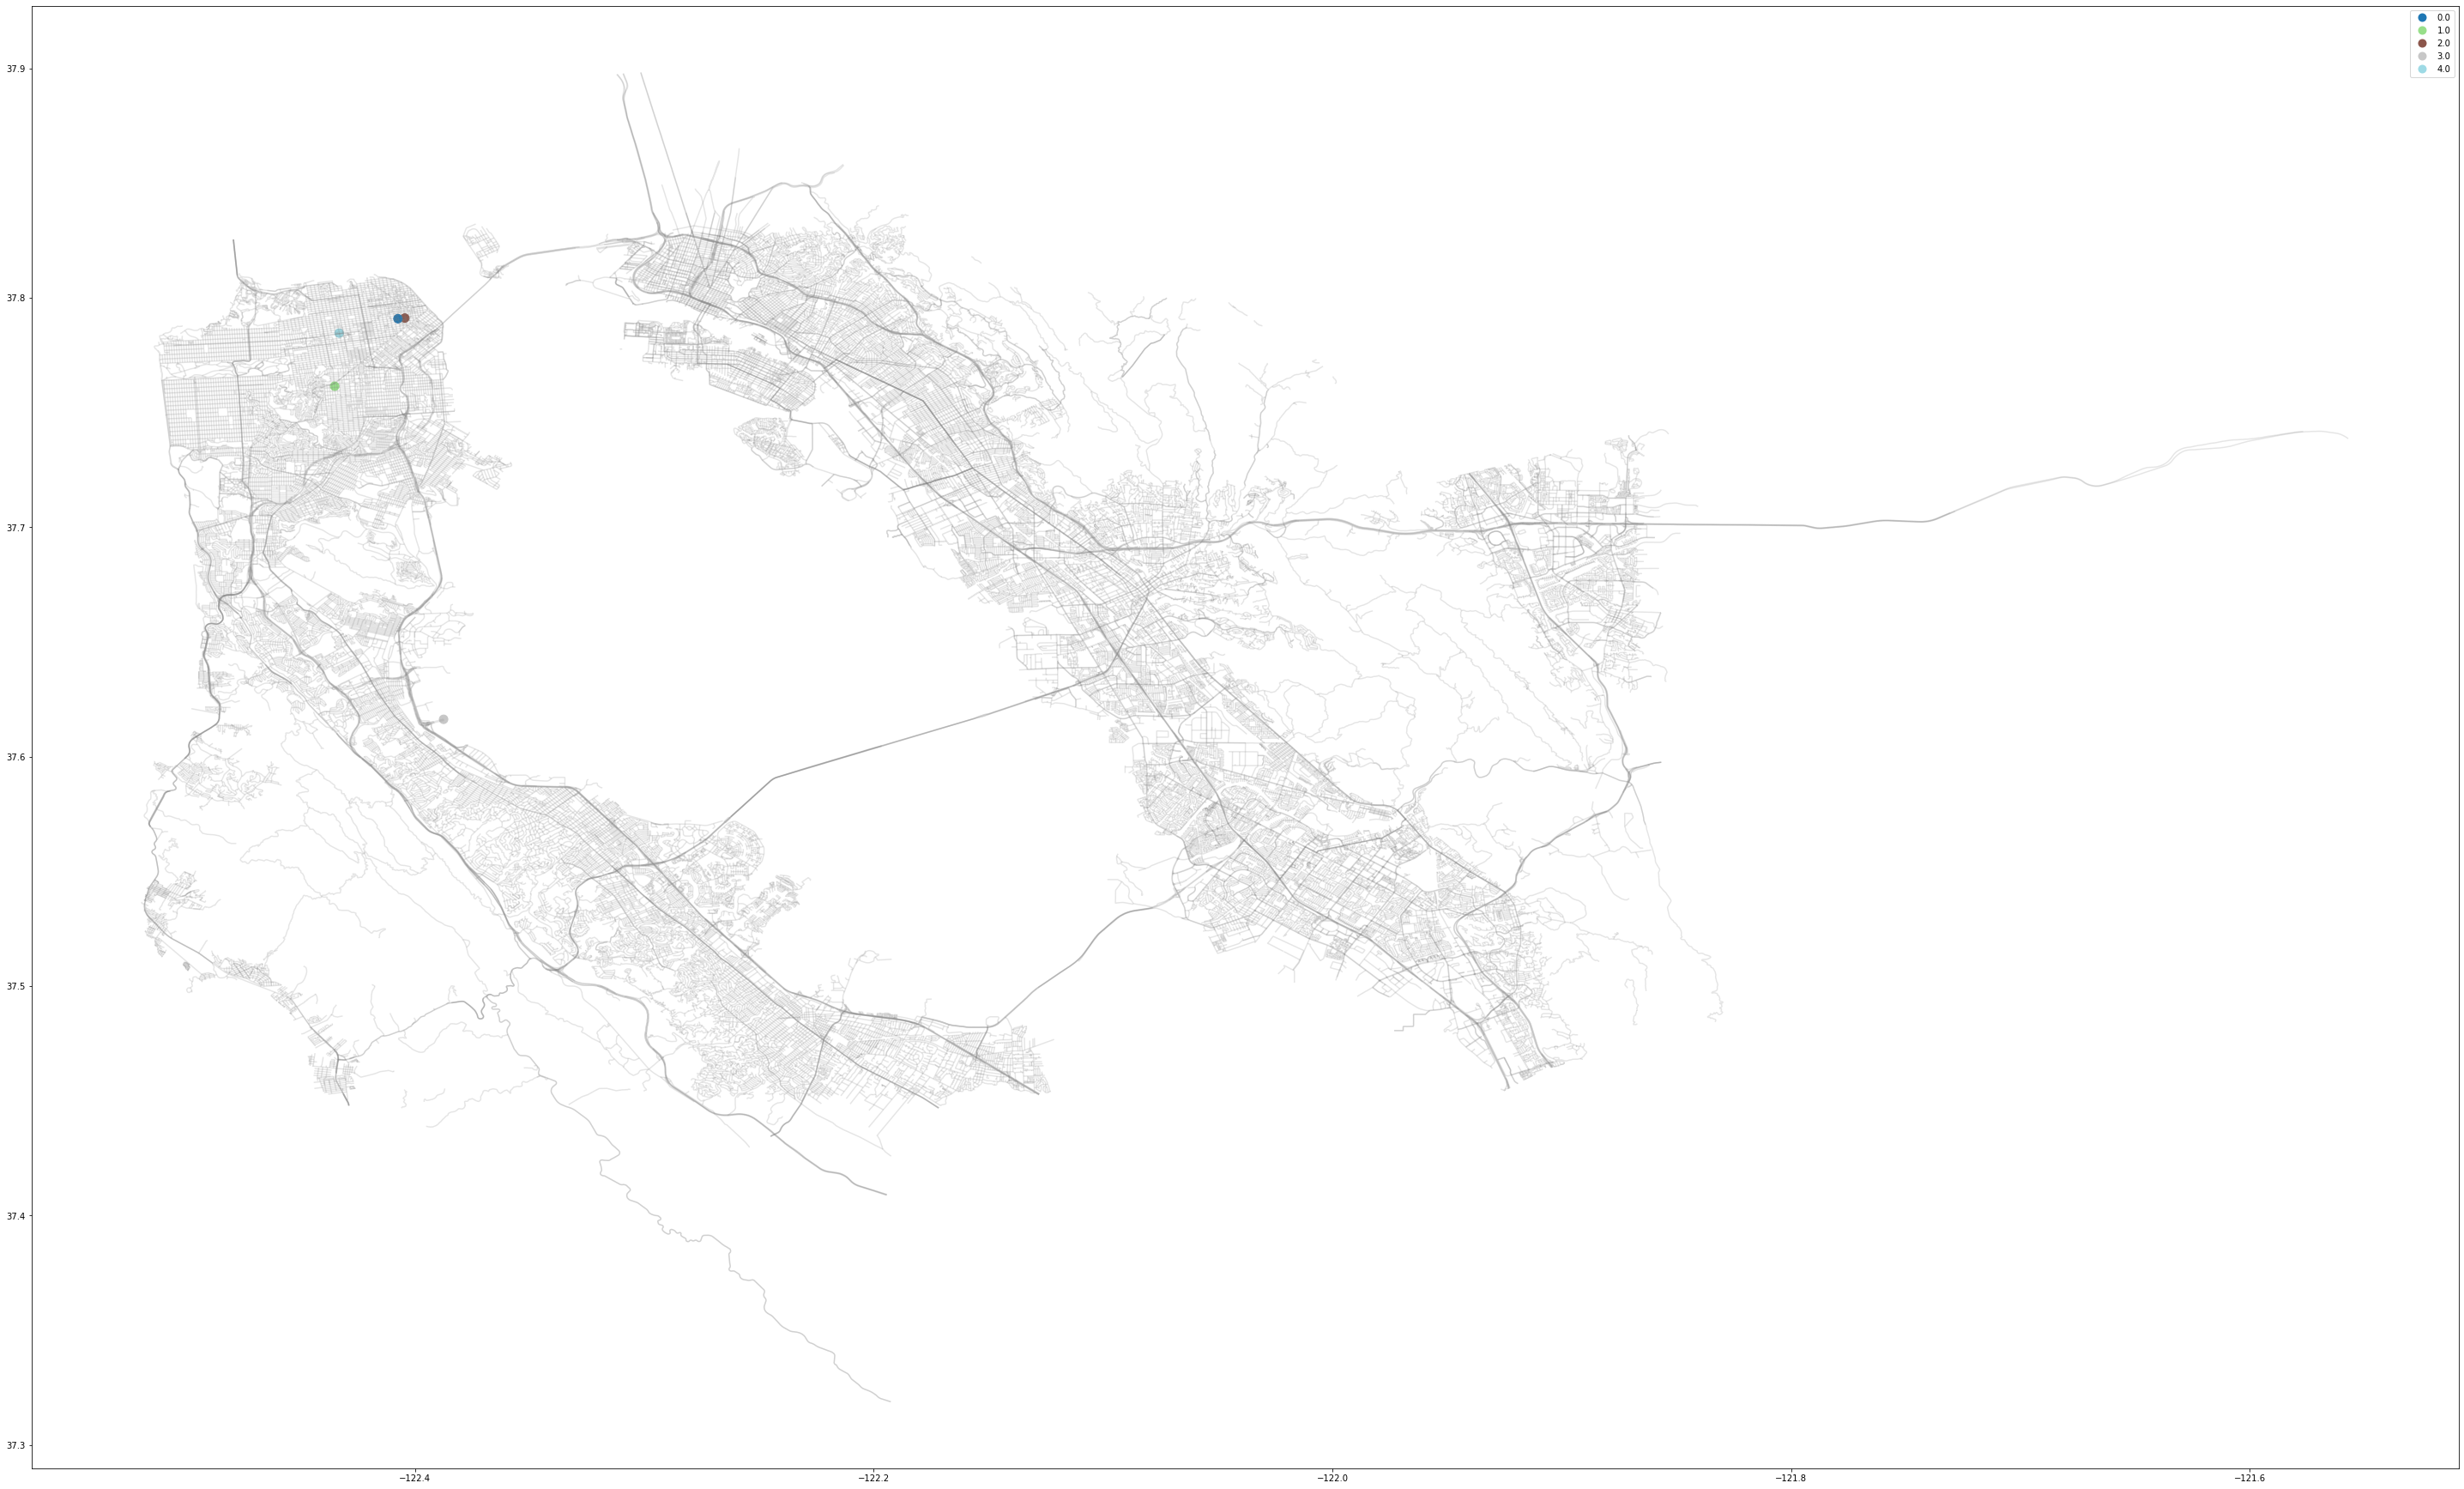

In [12]:
plt_map(df, "center.jpg")